# Model building - ML algorithms, BERT

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, re, operator, warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
#Loading the data combined from different datasources
df=pd.read_excel(r"C:/Users/swbatta/Documents/ML Apprentice/capstone/Sample data1.xlsx")

In [4]:
#Checking the number of observations in the data
len(df)

2687

In [5]:
#Observing the first few records of the data
df.head()

,Query,Tags,Split,source
0,'Why do I get anxious when my boyfriend goes o...,Anxiety,train,7cups
1,'Why do I always think my girlfriend is cheati...,Anxiety,train,7cups
2,"'Why do I always think I'm dying?""",Anxiety,train,7cups
3,'Why do anxious feelings create the need to go...,Anxiety,train,7cups
4,'Why am I so nervous around my boyfriend?',Anxiety,train,7cups


In [6]:
#Removing duplicates
df1=df[['Query','Tags','Split']].drop_duplicates()

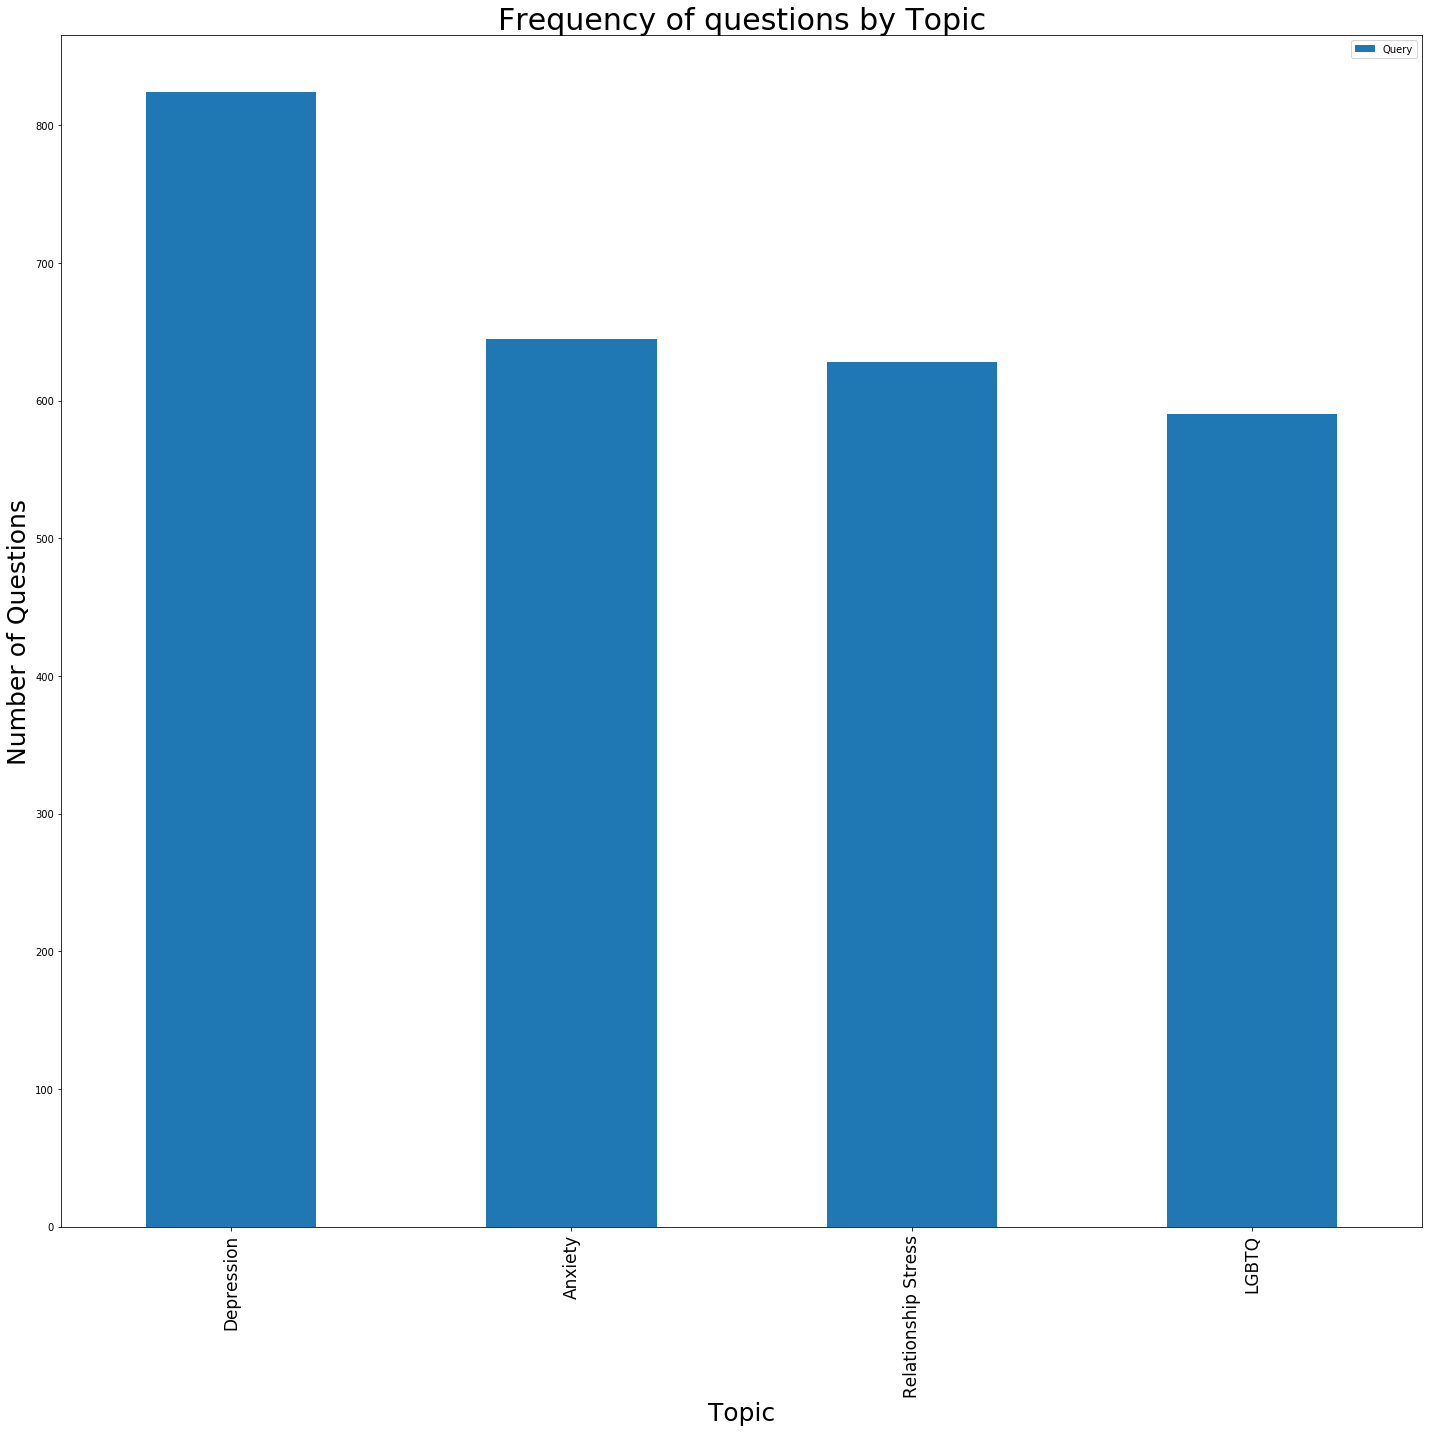

In [7]:
#Frequency of questions by topic
qt=df1[['Tags','Query']].drop_duplicates()
fig, ax = plt.subplots(figsize=(20, 20))
qt.groupby("Tags").agg("count").sort_values("Query",ascending=False).plot.bar(ax=ax)
ax.set_title("Frequency of questions by Topic", fontsize=30)
ax.set_xlabel("Topic", fontsize=25)
ax.set_ylabel("Number of Questions", fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
plt.tight_layout()
plt.savefig("figures/Frequency_of_questions_by_topic.png")

Implementing Naive Bayes & SVM classifiers

In [8]:
#Importing necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

In [9]:
#Splitting the data into Train & Test data sets for Naive Bayes & SVM models
X_train=df1['Query'][df1['Split']=='train']
y_train=df1['Tags'][df1['Split']=='train']
X_test=df1['Query'][df1['Split']=='test']
y_test=df1['Tags'][df1['Split']=='test']

In [13]:
#Number of observations in Train dataset
len(X_train)

1898

In [14]:
#Number of observations in Test dataset
len(X_test)

688

In [17]:
#NaiveBayes classifier

#Define Naive Bayes model
text_clf = Pipeline([('vect', CountVectorizer(stop_words="english")),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])

#Fit the model on Train data
text_clf = text_clf.fit(X_train, y_train)

#Predict the Tags on Test data
predict = text_clf.predict(X_test)

#Accuracy
np.mean(predict==y_test)

0.751453488372093

In [18]:
#Grid Search
parameters = {'vect__ngram_range':[(1,1),(1,2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2,1e-3)}

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

In [19]:
gs_clf.best_score_

0.7739952784335509

In [20]:
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

In [21]:
#SVM classifier

#Define SVM model
text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words="english")),
                     ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-2, random_state=42))
                    ])

#Fit the model on Train data
text_clf_svm = text_clf_svm.fit(X_train, y_train)

#Predict the Tags on Test data
predict_svm = text_clf_svm.predict(X_test)

#Accuracy
np.mean(predict_svm==y_test)

0.7543604651162791

In [22]:
#Grid Search
parameters_svm = {'vect__ngram_range':[(1,1),(1,2)],
              'tfidf__use_idf': (True, False),
              'clf-svm__alpha': (1e-2,1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)


In [23]:
gs_clf_svm.best_score_

0.8140341619219553

In [24]:
cohen_kappa_score(y_test, predict_svm, labels=None, weights=None, sample_weight=None)

0.6527722198663315

In [25]:
gs_clf_svm.best_params_

{'clf-svm__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

Spot checking ML algorithms

In [26]:
# Initiate a baseline model & spot check machine learning algorithms - Using Tfidf vectorizer only.
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from collections import Counter

# load the dataset
def load_dataset():

    # split into input and output elements
    X=df1['Query']
    y=df1['Tags']
    
    vectorizer = TfidfVectorizer(stop_words='english')
    X_mod = vectorizer.fit_transform(X) 
    y_mod=y

    return X_mod, y_mod
 
# evaluate a model
def evaluate_model(X, y, model, score_by):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=score_by, cv=cv, n_jobs=-1)
    return scores
 
# define models to test
def get_models():
    models, names = list(), list()
    # SVM
    models.append(SVC(gamma='auto'))
    names.append('SVM')
    # SGD
    models.append(SGDClassifier())
    names.append('SGD')
    #MultinomialNB
    models.append(MultinomialNB())
    names.append('NB')
    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')
    # Bagging
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    return models, names
 
# load the dataset
X, y = load_dataset()

#Baseline model

# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='most_frequent')
# evaluate the model
accuracy_score = evaluate_model(X, y, model, 'accuracy')
f1_score = evaluate_model(X, y, model, 'f1_weighted')
recall = evaluate_model(X, y, model, 'recall_weighted')
precision = evaluate_model(X, y, model, 'precision_weighted')

# summarize performance
print('Baseline Model Mean Accuracy: %.3f (%.3f)' % (mean(accuracy_score), std(accuracy_score)))
print('Baseline Model Mean f1: %.3f (%.3f)' % (mean(f1_score), std(f1_score)))
print('Baseline Model Mean recall: %.3f (%.3f)' % (mean(recall), std(recall)))
print('Baseline Model Mean recall: %.3f (%.3f)' % (mean(precision), std(precision)))


# define models
models, names = get_models()
results = list()
score_by=['accuracy','f1_weighted','recall_weighted','precision_weighted']
# evaluate each model
for i in range(len(models)):
    for scoring_method in score_by:
        # evaluate the model and store results
        scores = evaluate_model(X, y, models[i],scoring_method)
        results.append(scores)
        # summarize performance
        print('>%s %s %.3f (%.3f)' % (names[i], scoring_method, mean(scores), std(scores)))


(2687, 2787) (2687,) Counter({'Depression': 824, 'Anxiety': 645, 'Relationship Stress': 628, 'LGBTQ': 590})
Baseline Model Mean Accuracy: 0.307 (0.001)
Baseline Model Mean f1: 0.144 (0.001)
Baseline Model Mean recall: 0.307 (0.001)
Baseline Model Mean recall: 0.094 (0.000)
>SVM accuracy 0.307 (0.001)
>SVM f1_weighted 0.144 (0.001)
>SVM recall_weighted 0.307 (0.001)
>SVM precision_weighted 0.094 (0.000)
>SGD accuracy 0.785 (0.019)
>SGD f1_weighted 0.785 (0.019)
>SGD recall_weighted 0.785 (0.018)
>SGD precision_weighted 0.786 (0.019)
>NB accuracy 0.781 (0.016)
>NB f1_weighted 0.779 (0.017)
>NB recall_weighted 0.781 (0.016)
>NB precision_weighted 0.799 (0.017)
>KNN accuracy 0.389 (0.032)
>KNN f1_weighted 0.303 (0.042)
>KNN recall_weighted 0.389 (0.032)
>KNN precision_weighted 0.646 (0.055)
>BAG accuracy 0.767 (0.016)
>BAG f1_weighted 0.766 (0.013)
>BAG recall_weighted 0.767 (0.016)
>BAG precision_weighted 0.778 (0.017)
>RF accuracy 0.793 (0.016)
>RF f1_weighted 0.796 (0.016)
>RF recall_we

## Modeling Results

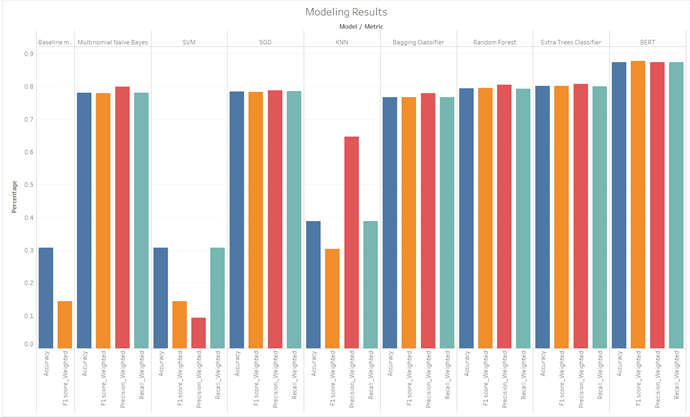


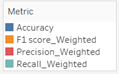

In [7]:
#Encoding the labels

possible_labels = df1.Tags.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

df1['label'] = df1.Tags.replace(label_dict)

In [8]:
#Train test validation split

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df1.index.values, 
                                                  df1.label.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df1.label.values)

df1['data_type'] = ['not_set']*df1.shape[0]

df1.loc[X_train, 'data_type'] = 'train'
df1.loc[X_val, 'data_type'] = 'val'

df1.groupby(['Tags', 'label', 'data_type']).count()

Query  Split
Tags                label data_type              
Anxiety             0     train        548    548
                          val           97     97
Depression          1     train        700    700
                          val          124    124
LGBTQ               3     train        501    501
                          val           89     89
Relationship Stress 2     train        534    534
                          val           94     94

In [9]:
from sklearn.metrics import classification_report
import torch
import transformers
from transformers import BertTokenizerFast
from transformers import BertForSequenceClassification
from tqdm.notebook import tqdm
from torch.utils.data import TensorDataset

In [10]:
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


encoded_data_train = tokenizer.batch_encode_plus(
    df1[df1.data_type=='train'].Query.values.tolist(), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    truncation=True,
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df1[df1.data_type=='val'].Query.values.tolist(), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    truncation=True,
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df1[df1.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df1[df1.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [11]:
# import BERT-base pretrained model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [12]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)



In [13]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [14]:
#Defining model evaluation metrics

from sklearn.metrics import f1_score, precision_score, recall_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def Evaluation_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    print(f'Overall Accuracy: {(len(preds_flat[preds_flat==labels_flat])/len(labels_flat))}\n')
    print(f'Overall f1_score: {f1_score(labels_flat, preds_flat, average="weighted")}\n')
    print(f'Overall Precision: {precision_score(labels_flat, preds_flat, average="weighted")}\n')
    print(f'Overall Recall: {recall_score(labels_flat, preds_flat, average="weighted")}\n')
          
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {(len(y_preds[y_preds==label])/len(y_true))}\n')
        print(f'f1_score: {f1_score(y_true, y_preds, average="weighted")}\n')
        print(f'precision_score: {precision_score(y_true, y_preds, average="weighted")}\n')
        print(f'recall_score: {recall_score(y_true, y_preds, average="weighted")}\n')
              

In [15]:
#Training Loop
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

if torch.cuda.is_available():
    device = torch.device('cuda')

else:
    device=torch.device('cpu')

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals


In [16]:
#Training Loop continued..
for epoch in tqdm(range(1, epochs+1)):
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'C:\\Users\\swbatta\\Documents\\ML Apprentice\\capstone\\epoch_data1\\finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')



Epoch 1
Training loss: 0.7473693586195698
Validation loss: 0.557686496094835
F1 Score (Weighted): 0.8295707198492269



Epoch 2
Training loss: 0.4011746294302046
Validation loss: 0.5984593867220812
F1 Score (Weighted): 0.8736168824836711



Epoch 3
Training loss: 0.23788377281277454
Validation loss: 0.6193702528628313
F1 Score (Weighted): 0.8755859732454789



Epoch 4
Training loss: 0.16122576337252315
Validation loss: 0.6679476669560515
F1 Score (Weighted): 0.8748022883288882



Epoch 5
Training loss: 0.09544314758898935
Validation loss: 0.6820554249956601
F1 Score (Weighted): 0.8725214413077063



In [30]:
#Output the performance per epoch
for epoch in range(1,6):
    model.load_state_dict(torch.load(f'C:\\Users\\swbatta\\Documents\\ML Apprentice\\capstone\\epoch_data1\\finetuned_BERT_epoch_{epoch}.model', map_location=torch.device('cpu')))

    print(f"Epoch {epoch}")

    _, predictions, true_vals = evaluate(dataloader_validation)

    Evaluation_per_class(predictions, true_vals)

Epoch 1
Overall Accuracy: 0.8316831683168316

Overall f1_score: 0.8295707198492269

Overall Precision: 0.8303898444361556

Overall Recall: 0.8316831683168316

Class: Anxiety
Accuracy: 0.7216494845360825

f1_score: 0.8383233532934131

precision_score: 1.0

recall_score: 0.7216494845360825

Class: Depression
Accuracy: 0.8709677419354839

f1_score: 0.9310344827586207

precision_score: 1.0

recall_score: 0.8709677419354839

Class: Relationship Stress
Accuracy: 0.776595744680851

f1_score: 0.8742514970059879

precision_score: 1.0

recall_score: 0.776595744680851

Class: LGBTQ
Accuracy: 0.9550561797752809

f1_score: 0.9770114942528737

precision_score: 1.0

recall_score: 0.9550561797752809

Epoch 2
Overall Accuracy: 0.8762376237623762

Overall f1_score: 0.8736168824836711

Overall Precision: 0.8806569111333677

Overall Recall: 0.8762376237623762

Class: Anxiety
Accuracy: 0.7216494845360825

f1_score: 0.8383233532934131

precision_score: 1.0

recall_score: 0.7216494845360825

Class: Depressio

In [28]:
#Loading the model from the desired epoch & evaluating the model

#model = BertForSequenceClassification.from_pretrained("bert-base-uncased",

#                                                      num_labels=len(label_dict),

#                                                      output_attentions=False,

#                                                      output_hidden_states=False)



#model.to(device)

model.load_state_dict(torch.load('C:\\Users\\swbatta\\Documents\\ML Apprentice\\capstone\\epoch_data1\\finetuned_BERT_epoch_3.model', map_location=torch.device('cpu')))



_, predictions, true_vals = evaluate(dataloader_validation)



In [29]:
Evaluation_per_class(predictions, true_vals)

Overall Accuracy: 0.8762376237623762

Overall f1_score: 0.8755859732454789

Overall Precision: 0.8759682412606662

Overall Recall: 0.8762376237623762

Class: Anxiety
Accuracy: 0.8041237113402062

f1_score: 0.8914285714285715

precision_score: 1.0

recall_score: 0.8041237113402062

Class: Depression
Accuracy: 0.8951612903225806

f1_score: 0.9446808510638298

precision_score: 1.0

recall_score: 0.8951612903225806

Class: Relationship Stress
Accuracy: 0.851063829787234

f1_score: 0.9195402298850576

precision_score: 1.0

recall_score: 0.851063829787234

Class: LGBTQ
Accuracy: 0.9550561797752809

f1_score: 0.9770114942528737

precision_score: 1.0

recall_score: 0.9550561797752809



In [40]:
#Formatting Test data into required format for modeling
def test_data(ls):
    test_data = pd.DataFrame(ls,columns = ['Query'])

    test_data.label = ""
    return test_data

#Input Test data(Query) as a list
test_data = test_data(["I am worried about tomorrow's results. I was unable to sleep well since the past few days"])


In [41]:
#
encoded_data_test = tokenizer.batch_encode_plus(
    test_data.Query.values.tolist(), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    truncation=True,
    max_length=256, 
    return_tensors='pt'
)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']

dataset_test = TensorDataset(input_ids_test, attention_masks_test)

batch_size = 3

dataloader_test = DataLoader(dataset_test, 
                                   sampler=SequentialSampler(dataset_test), 
                                   batch_size=batch_size)

predictions = []

for d in dataloader_test:
    d=tuple(t.to(device) for t in d)
    
    b_input_ids, b_input_mask = d
    
    with torch.no_grad():
        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        
    logits = outputs[0]
    
    logits = logits.detach().cpu().numpy()
    
    predictions.append(logits)


flat_predictions = [item for sublist in predictions for item in sublist]

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

for i in label_dict:
    if (label_dict[i] == flat_predictions):
        print(i)

Anxiety


In [42]:
predictions

[array([[ 5.8281436, -1.0683335, -1.5031102, -2.2258134]], dtype=float32)]

## References:

https://machinelearningmastery.com/imbalanced-multiclass-classification-with-the-glass-identification-dataset/
https://towardsdatascience.com/multi-class-text-classification-with-deep-learning-using-bert-b59ca2f5c613
https://medium.com/@aniruddha.choudhury94/part-2-bert-fine-tuning-tutorial-with-pytorch-for-text-classification-on-the-corpus-of-linguistic-18057ce330e1
https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean

## End of Program